In [1]:
import numpy as np
import pandas as pd

In [2]:
reddit = pd.read_csv("data/Reddit_Data.csv")
twitter = pd.read_csv("data/Twitter_Data.csv")

In [3]:
reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
twitter.dropna(inplace=True)

In [6]:
# twitter preprocess
twitter["category"] = twitter['category'].astype(int)

In [7]:
twitter.rename(columns={'clean_text' : 'clean_comment'}, inplace=True)

In [8]:
df = pd.concat([reddit, twitter], ignore_index=True)

### Cleaning Data

<Axes: xlabel='category', ylabel='count'>

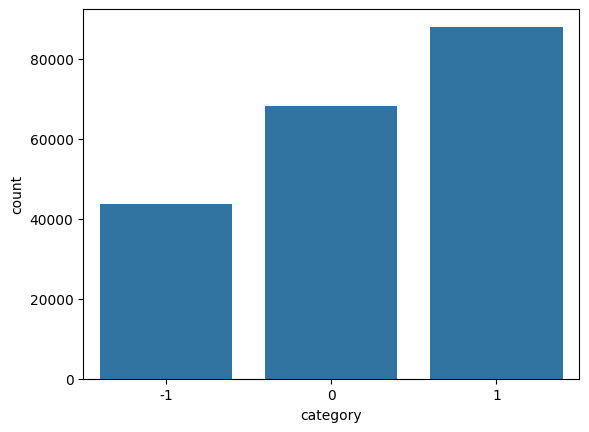

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

In [10]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

category
 1    43.99
 0    34.14
-1    21.87
Name: proportion, dtype: float64

In [11]:
## Removing any nan
df.dropna(inplace=True)

In [12]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [13]:
df['word_count'].describe()

count    200118.000000
mean         21.811406
std          26.531885
min           0.000000
25%          10.000000
50%          18.000000
75%          29.000000
max        1307.000000
Name: word_count, dtype: float64

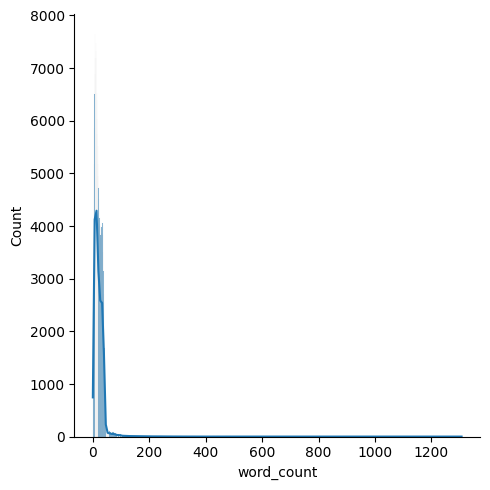

In [14]:
sns.displot(df['word_count'], kde=True)

#### Text Length

<Axes: >

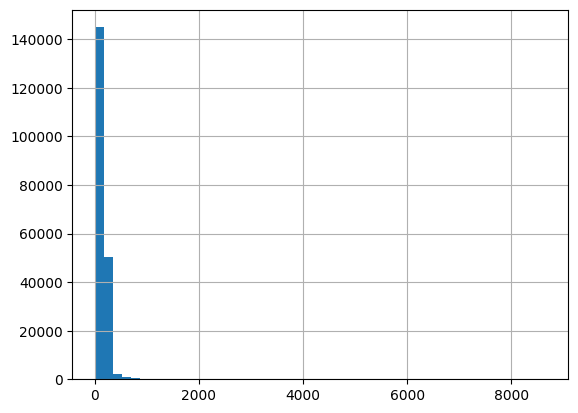

In [15]:
df['text_length'] = df['clean_comment'].apply(len)
df['text_length'].hist(bins=50)

<Axes: ylabel='text_length'>

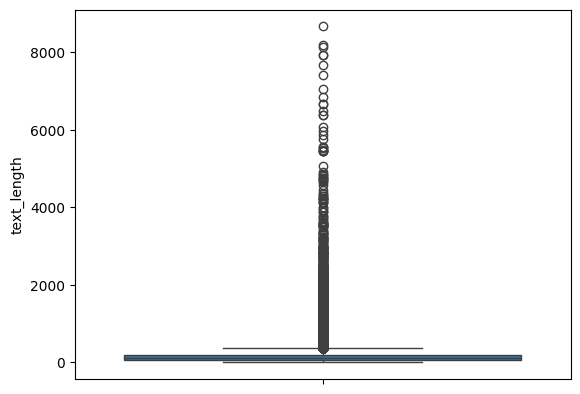

In [16]:
sns.boxplot(df['text_length'])

In [ ]:
df['text_length'].describe()

count    200118.000000
mean        134.798599
std         167.641824
min           1.000000
25%          61.000000
50%         109.000000
75%         183.000000
max        8665.000000
Name: text_length, dtype: float64

In [18]:
df['text_length'].quantile(0.97)

np.float64(276.4899999999907)

In [19]:
df[df["text_length"] > 260]

,clean_comment,category,word_count,text_length
0,family mormon have never tried explain them t...,1,39,261
1,buddhism has very much lot compatible with chr...,1,196,1269
2,seriously don say thing first all they won get...,-1,86,460
4,for your own benefit you may want read living ...,1,112,691
6,was teens when discovered zen meditation was ...,1,155,965
...,...,...,...,...
190701,narendra modi has thrived because his workhe h...,1,40,261
193090,rathee has complained about food quality and b...,-1,39,265
194789,bada hindu didnt approve nehruindirarajivsonia...,1,32,263
198028,rang badalna aap kaam siddu you were with bjpt...,1,44,268


In [20]:
df[df["text_length"] > 260]["category"].value_counts()

category
 1    4406
-1    1952
 0     295
Name: count, dtype: int64

In [21]:
todrop = df[df["text_length"] > 260].index
temp_df = df.drop(todrop)

In [22]:
temp_df

,clean_comment,category,word_count,text_length
3,what you have learned yours and only yours wha...,0,29,168
5,you should all sit down together and watch the...,-1,23,146
7,jesus was zen meets jew,0,5,24
9,dont worry about trying explain yourself just ...,1,31,193
11,unto others you would have them unto you woul...,1,11,59
...,...,...,...,...
200213,why these 456 crores paid neerav modi not reco...,-1,18,108
200214,dear rss terrorist payal gawar what about modi...,-1,36,248
200215,did you cover her interaction forum where she ...,0,9,51
200216,there big project came into india modi dream p...,0,13,77


<Axes: >

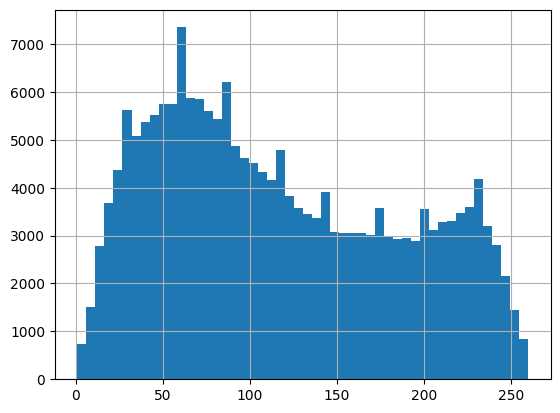

In [23]:
temp_df['text_length'].hist(bins=50)

In [24]:
temp_df['text_length'].describe()

count    193465.000000
mean        117.153475
std          68.734741
min           1.000000
25%          59.000000
50%         105.000000
75%         175.000000
max         260.000000
Name: text_length, dtype: float64

#### Word Count

In [25]:
temp_df["category"].value_counts()

category
 1    83673
 0    67958
-1    41834
Name: count, dtype: int64

In [26]:
temp_df["word_count"].describe()

count    193465.000000
mean         18.985630
std          11.039176
min           0.000000
25%          10.000000
50%          17.000000
75%          28.000000
max          89.000000
Name: word_count, dtype: float64

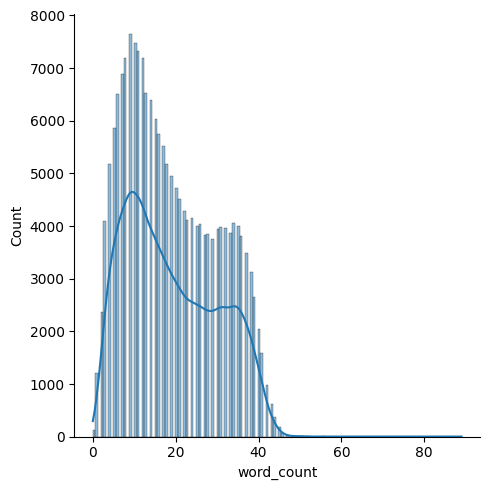

In [27]:
sns.displot(temp_df['word_count'], kde=True)

<Axes: ylabel='word_count'>

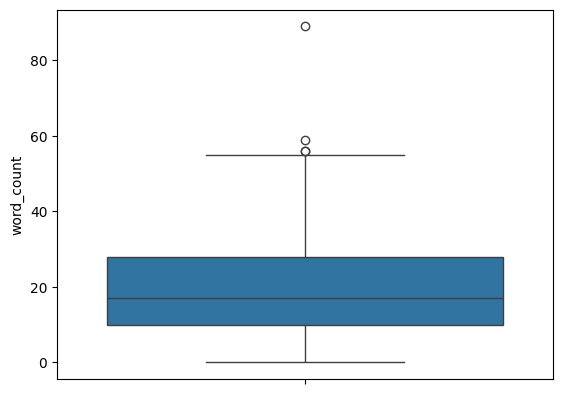

In [28]:
sns.boxplot(temp_df['word_count'])

In [29]:
temp_df.drop(temp_df[temp_df["word_count"] > 45].index, inplace=True)

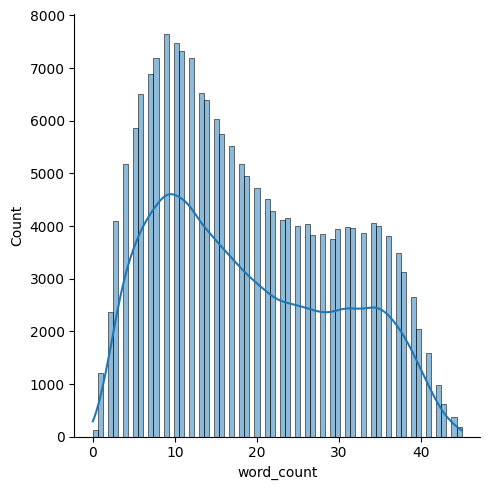

In [30]:
sns.displot(temp_df['word_count'], kde=True)

<Axes: ylabel='word_count'>

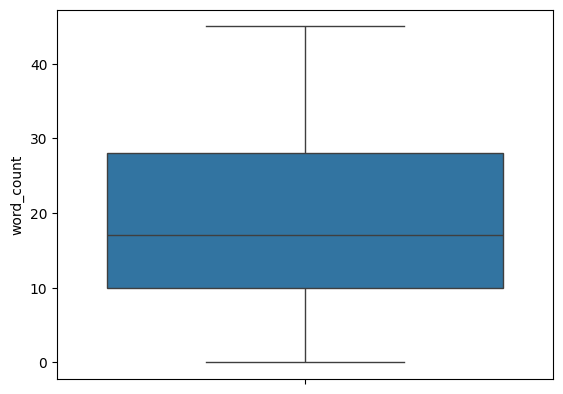

In [31]:
sns.boxplot(temp_df['word_count'])

In [32]:
temp_df["word_count"].describe()

count    193308.000000
mean         18.962200
std          11.012401
min           0.000000
25%          10.000000
50%          17.000000
75%          28.000000
max          45.000000
Name: word_count, dtype: float64

#### Duplicated Data

In [33]:
temp_df.duplicated().sum()

np.int64(405)

In [34]:
temp_df.drop_duplicates(inplace=True)

In [35]:
temp_df.duplicated().sum()

np.int64(0)

In [36]:
temp_df[(temp_df['clean_comment'].str.strip() == '')]

,clean_comment,category,word_count,text_length
181,,0,0,1
4432,\n,0,0,1
10592,,0,0,4
16173,,0,0,2
32149,\n,0,0,21
34959,,0,0,3


In [37]:
temp_df = temp_df[~(temp_df['clean_comment'].str.strip() == '')]

In [38]:
temp_df[(temp_df['clean_comment'].str.strip() == '')]

,clean_comment,category,word_count,text_length


### Sentiment Value Counts

In [39]:
temp_df["category"].value_counts()

category
 1    83512
 0    67623
-1    41762
Name: count, dtype: int64

In [40]:
# Length of dataset
len(temp_df)

192897

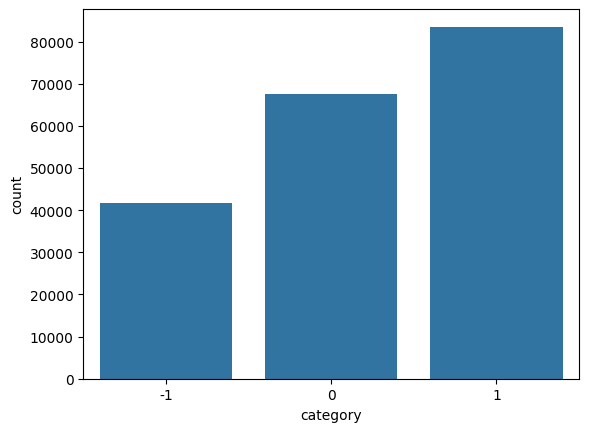

In [41]:
sns.countplot(data=temp_df,x="category")
plt.show()

### Export Data

In [42]:
# Remove word_count and text_length columns
temp_df.drop(columns=["word_count","text_length"],inplace=True)

/tmp/ipykernel_48092/2144425973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop(columns=["word_count","text_length"],inplace=True)


In [43]:
# Shuffle the DataFrame
shuffled_df = temp_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
shuffled_df

,clean_comment,category
0,modi govt most peacefull era can bcoz say\nwhe...,1
1,prof nalapat concludes\nshould prime minister ...,0
2,country needs more years modi govt present par...,1
3,how many times have you asked this question ou...,1
4,nareendra modi you are the best the world supp...,1
...,...,...
192892,you are modi dalal shame you,0
192893,sir this modi government who doesnt have speak...,-1
192894,everything modi touches turns dust\nevery acti...,1
192895,pmobig space leap for india narendra modi addr...,0


In [45]:
temp_df.to_csv("data/merged/sentiments.csv",index= False)

### Undersample Data Due to Imbalance

In [46]:
negative = temp_df[temp_df["category"] == -1]
neutral = temp_df[temp_df["category"] == 0]
positive = temp_df[temp_df["category"] == 1]

In [47]:
# Sample data
negative_sampled = negative.sample(40000,random_state=42)
neutral_sampled = neutral.sample(40000,random_state=42)
positive_sampled = positive.sample(40000,random_state=42)

In [48]:
# Merge Sampled Data
undersampled_df = pd.concat([negative_sampled, neutral_sampled, positive_sampled])

In [49]:
# Shuffle Sampled Data
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
undersampled_df

,clean_comment,category
0,cant believe this modi,0
1,karachi under total blackout,0
2,what couldnt done years modi did years increas...,0
3,while modi talks about worlds tallest statue t...,-1
4,major announcement modi everyone was waiting f...,-1
...,...,...
119995,most these media houses gagged court actually ...,1
119996,lol mama joke 4375483 jpg,1
119997,dont want reply from our want action from our ...,1
119998,let them fight out while count the cheques mod...,-1


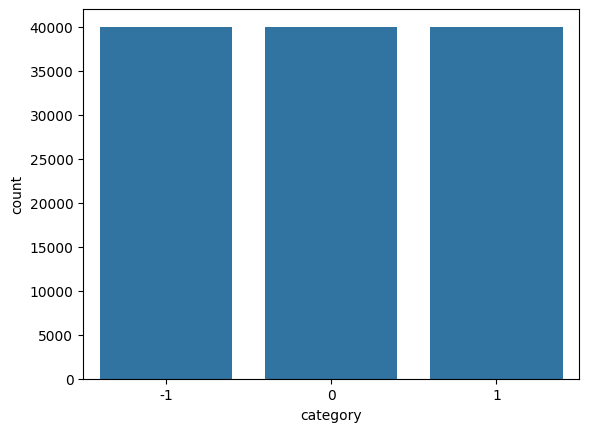

In [50]:
sns.countplot(data=undersampled_df,x="category")
plt.show()

In [51]:
undersampled_df["category"].value_counts()

category
 0    40000
-1    40000
 1    40000
Name: count, dtype: int64

In [53]:
# Export Data
undersampled_df.to_csv("data/merged/sentiments_undersampled.csv",index = False)